In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import adfuller, kpss
# import plotly.graph_objects as go

In [93]:
data_pump = pd.read_csv("pumpdata/pumpdata.csv")
data_weather = pd.read_csv("weatherdata/weatherdata.csv")

In [94]:
df = pd.merge(data_weather, data_pump, left_on='date', right_on='time', how='inner')
df['date'] = pd.to_datetime(df['date'])
df.drop(columns=['time'], inplace= True)

In [95]:
df.to_csv('data.csv', index = False)

In [96]:
df.shape

(1567, 25)

## EDA

In [97]:
df.head(5)

,date,temperature,feels_like,wind_chill,soil_temperature,dew_point,surface_temperature,pressure,cape,evaporation,...,wind_angle,cloud_cover_total,cloud_cover_low,cloud_cover_middle,cloud_cover_high,precipitation_total,energy_consumption,outdoor_temp,room_temp,room_temp_setpoint
0,2023-03-21 06:00:00+00:00,8.7,5.6,6.1,8.3,8.4,8.0,1014.0,3.5,0.0,...,212.5,100.0,100.0,72.0,98.2,2.9,0.037,9.0,20.2,20.0
1,2023-03-21 12:00:00+00:00,9.8,6.3,7.2,8.5,8.5,9.2,1012.3,6.2,0.1,...,201.2,100.0,70.5,92.2,99.5,2.4,3.603,10.8,20.0,20.0
2,2023-03-21 18:00:00+00:00,11.2,6.7,8.5,10.2,8.1,11.6,1010.3,2.5,0.1,...,222.3,93.0,77.3,46.7,27.7,0.0,2.717,12.0,19.9,20.0
3,2023-03-22 00:00:00+00:00,9.7,5.1,6.5,9.2,7.6,8.9,1008.7,0.0,0.0,...,219.5,84.8,28.0,12.5,69.7,0.0,0.240,8.2,19.3,20.0
4,2023-03-22 06:00:00+00:00,9.4,4.8,6.2,8.6,6.9,8.8,1005.8,6.2,0.0,...,209.2,87.7,48.2,63.3,77.2,0.0,0.036,8.1,18.8,20.0


In [98]:
df.columns

Index(['date', 'temperature', 'feels_like', 'wind_chill', 'soil_temperature',
       'dew_point', 'surface_temperature', 'pressure', 'cape', 'evaporation',
       'irradiance', 'ozone', 'humidity', 'wind_speed', 'wind_gusts',
       'wind_angle', 'cloud_cover_total', 'cloud_cover_low',
       'cloud_cover_middle', 'cloud_cover_high', 'precipitation_total',
       'energy_consumption', 'outdoor_temp', 'room_temp',
       'room_temp_setpoint'],
      dtype='object')

In [99]:
# check for missing values
df.isnull().sum()

date                   0
temperature            0
feels_like             0
wind_chill             0
soil_temperature       0
dew_point              0
surface_temperature    0
pressure               0
cape                   0
evaporation            0
irradiance             0
ozone                  0
humidity               0
wind_speed             0
wind_gusts             0
wind_angle             0
cloud_cover_total      0
cloud_cover_low        0
cloud_cover_middle     0
cloud_cover_high       0
precipitation_total    0
energy_consumption     0
outdoor_temp           0
room_temp              0
room_temp_setpoint     0
dtype: int64

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 1567 non-null   datetime64[ns, UTC]
 1   temperature          1567 non-null   float64            
 2   feels_like           1567 non-null   float64            
 3   wind_chill           1567 non-null   float64            
 4   soil_temperature     1567 non-null   float64            
 5   dew_point            1567 non-null   float64            
 6   surface_temperature  1567 non-null   float64            
 7   pressure             1567 non-null   float64            
 8   cape                 1567 non-null   float64            
 9   evaporation          1567 non-null   float64            
 10  irradiance           1567 non-null   float64            
 11  ozone                1567 non-null   float64            
 12  humidity            

In [101]:
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

date : <DatetimeArray>
['2023-03-21 06:00:00+00:00', '2023-03-21 12:00:00+00:00',
 '2023-03-21 18:00:00+00:00', '2023-03-22 00:00:00+00:00',
 '2023-03-22 06:00:00+00:00', '2023-03-22 12:00:00+00:00',
 '2023-03-22 18:00:00+00:00', '2023-03-23 00:00:00+00:00',
 '2023-03-23 06:00:00+00:00', '2023-03-23 12:00:00+00:00',
 ...
 '2024-04-13 12:00:00+00:00', '2024-04-13 18:00:00+00:00',
 '2024-04-14 00:00:00+00:00', '2024-04-14 06:00:00+00:00',
 '2024-04-14 12:00:00+00:00', '2024-04-14 18:00:00+00:00',
 '2024-04-15 00:00:00+00:00', '2024-04-15 06:00:00+00:00',
 '2024-04-15 12:00:00+00:00', '2024-04-15 18:00:00+00:00']
Length: 1567, dtype: datetime64[ns, UTC]
temperature : [ 8.7  9.8 11.2  9.7  9.4 10.  10.7 11.  11.3 12.9 11.8 10.6 10.5 11.4
  9.9  8.8  9.1  7.9  6.   7.2  7.4  5.2  3.5  4.9  6.4  3.6  0.9  4.5
  6.7  6.5 12.2 12.3 11.9 10.8  9.2  4.7  4.   8.   1.4  8.6  4.2  0.6
  5.1  0.3  5.8 10.1  7.1  7.8  8.5  9.5  5.9  8.2 13.3  8.1  8.3  9.
  9.6  7.3 10.4  4.4  6.8 12.8  6.6 12.6  8.

In [102]:
import plotly.express as px
fig = px.line(df, x='date', y='energy_consumption', title='DailyConsumption vs Date')
fig.show()

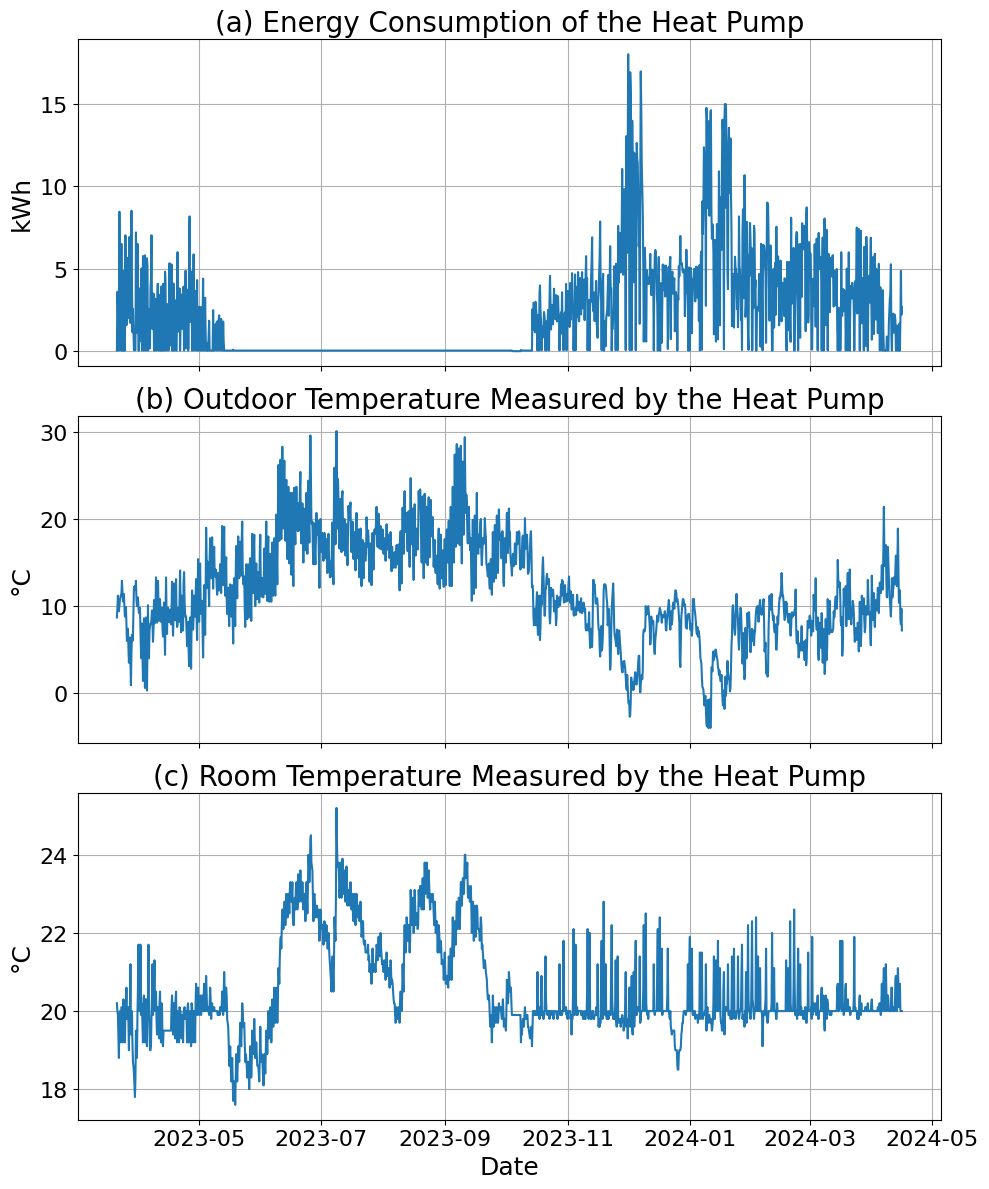

In [103]:
# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

ax[0].plot(df['date'], df['energy_consumption'])
ax[0].set_title('(a) Energy Consumption of the Heat Pump', fontsize=20) 
ax[0].set_ylabel('kWh', fontsize=18)  
ax[0].tick_params(axis='both', labelsize=16)  
ax[0].grid(True)

ax[1].plot(df['date'], df['temperature'])
ax[1].set_title('(b) Outdoor Temperature Measured by the Heat Pump', fontsize=20)
ax[1].set_ylabel('°C', fontsize=18)
ax[1].tick_params(axis='both', labelsize=16)
ax[1].grid(True)

ax[2].plot(df['date'], df['room_temp'])
ax[2].set_title('(c) Room Temperature Measured by the Heat Pump', fontsize=20)
ax[2].set_ylabel('°C', fontsize=18)
ax[2].set_xlabel('Date', fontsize=18)
ax[2].tick_params(axis='both', labelsize=16)
ax[2].grid(True)

plt.tight_layout()

plt.show()

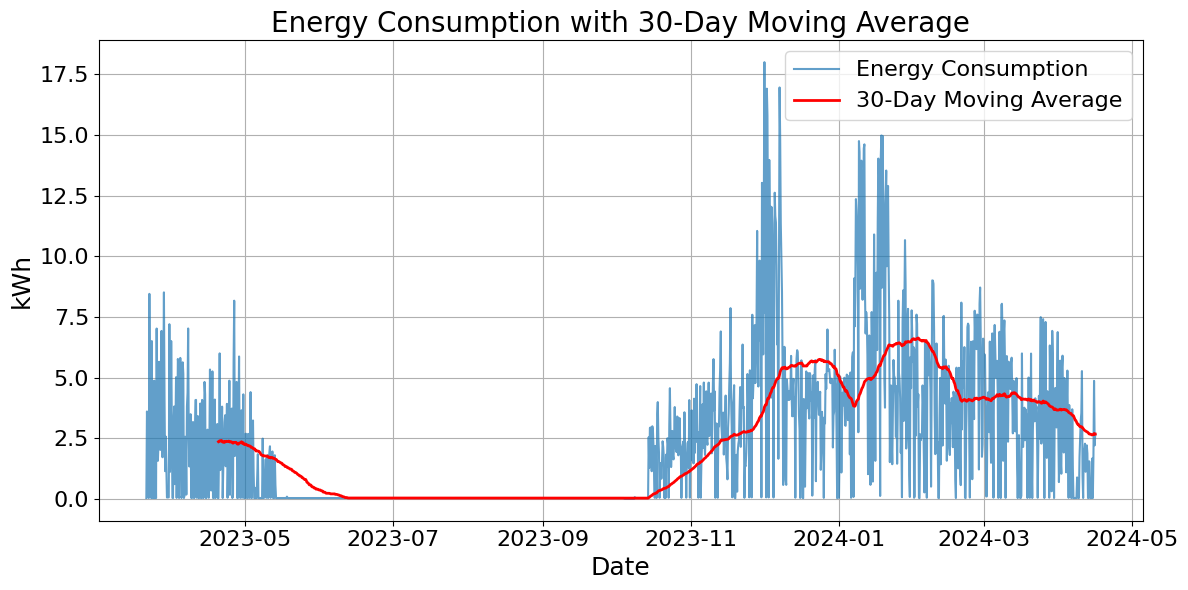

In [104]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["energy_consumption"], label="Energy Consumption", alpha=0.7)
plt.plot(df["date"], df["energy_consumption"].rolling(window=120).mean(), label="30-Day Moving Average", color="red", linewidth=2)

plt.xlabel("Date", fontsize=18)
plt.ylabel("kWh", fontsize=18)
plt.title("Energy Consumption with 30-Day Moving Average", fontsize=20)
plt.legend(fontsize=16)
plt.grid(True)
plt.tick_params(axis='both', labelsize=16)

plt.tight_layout()

plt.show()

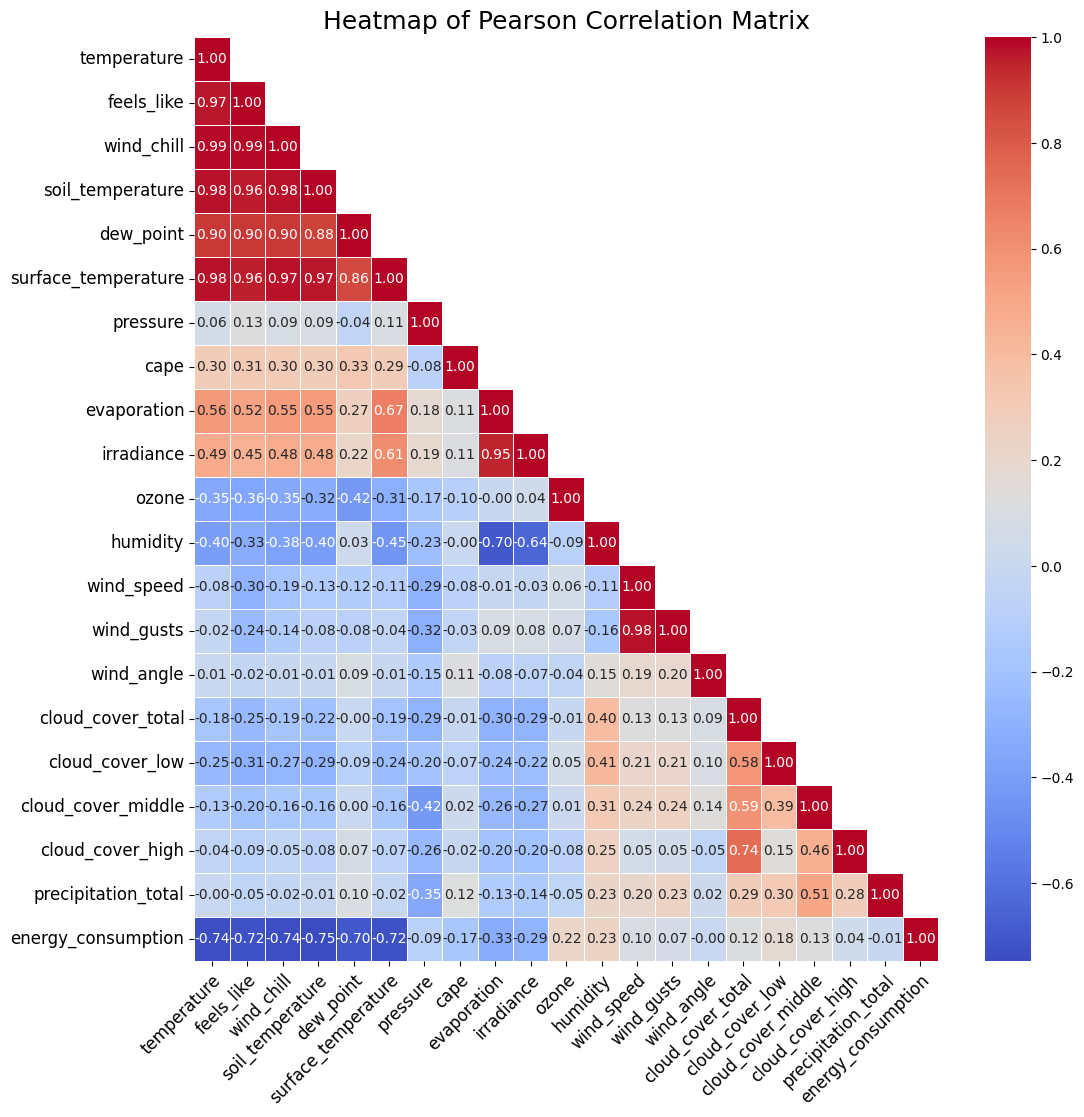

In [105]:
# heatmap
plt.figure(figsize=(12,12))
plt.title('Heatmap of Pearson Correlation Matrix', fontsize=18)
corr = df.drop(columns=['date', 'outdoor_temp', 'room_temp','room_temp_setpoint']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
sns.heatmap(corr,mask=mask, annot=True, fmt=".2f",cbar=True,cmap='coolwarm', linewidths=.5)
plt.xticks(rotation=45, fontsize=12, ha="right", rotation_mode="anchor")
plt.yticks(rotation=0, fontsize=12)

plt.show()

In [106]:
df = df[(df['date'] <= '2023-05-14') | (df['date'] >= '2023-10-15 6:00')].reset_index(drop=True)

In [107]:
# descriptive stats
numeric_df = df['energy_consumption']
summary = numeric_df.describe().round(1).transpose()
summary.loc['skewness'] = numeric_df.skew().round(1)
summary.loc['kurtosis'] = numeric_df.kurt().round(1)

summary = summary.rename(index={'50%': 'median'})

summary = summary.loc[['mean', 'median', 'std', 'skewness', 'kurtosis']]

summary

mean        3.7
median      3.2
std         3.1
skewness    1.3
kurtosis    2.4
Name: energy_consumption, dtype: float64

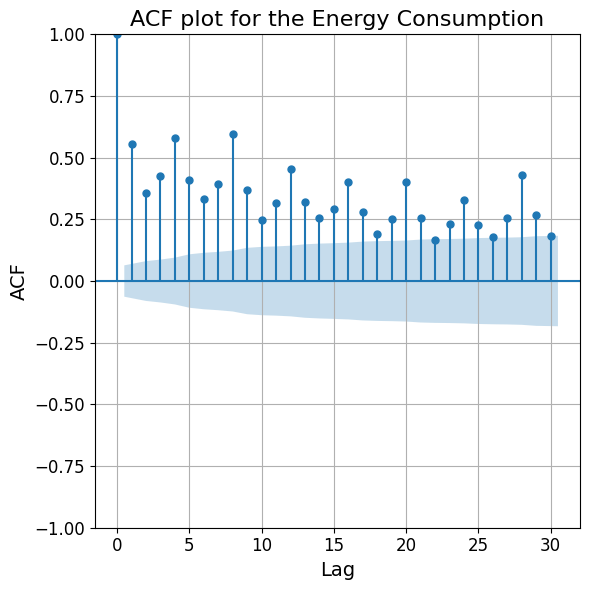

In [108]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def plot_acf_only(df: pd.DataFrame) -> None:
    fig, ax = plt.subplots(figsize=(6, 6), facecolor='w')

    # Plot ACF
    plot_acf(df, ax=ax)
    ax.set_title("ACF plot for the Energy Consumption", fontsize=16)
    ax.set_ylabel("ACF", fontsize=14)
    ax.set_xlabel("Lag", fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(alpha=1)

    plt.tight_layout()
    plt.show()

no_diff = diff(df['energy_consumption'], k_diff=0, k_seasonal_diff=0, seasonal_periods=4)
plot_acf_only(no_diff)


In [109]:
# adf test
def adf_test(timeserie):
    print("Results of ADF Test:")
    result = adfuller(timeserie)
    print(result[1])
    if result[1] > 0.05:
        print('ADF: We cannot reject the null hypothesis(Ho), data is non-stationary')
    else:
        print('ADF: reject the null hypothesis, data is stationary')
    
    return result
def kpss_test(timeserie):
    print("Results of KPSS Test:")
    result = kpss(timeserie)
    print(result[1])
    if result[1] >= 0.05:
        print('KPSS: We cannot reject the null hypothesis(Ho), data is stationary\n')
    else:
        print('KPSS: reject the null hypothesis, data is non-stationary\n')

    return result


def stationary_test(timeserie):
    adf_result = adf_test(timeserie)
    adf_p_value = adf_result[1]
    kpss_result = kpss_test(timeserie)
    kpss_p_value = kpss_result[1]

    if adf_p_value > 0.05 and kpss_p_value <= 0.05:
        print("Series is non-stationary")
    elif adf_p_value <= 0.05 and kpss_p_value > 0.05:
        print("Series is stationary")
    elif adf_p_value > 0.05 and kpss_p_value > 0.05:
        print("The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.")
    elif adf_p_value <= 0.05 and kpss_p_value <= 0.05: 
        print("The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.")

    print("-----------------------------------------------------------------------------------")

In [110]:
simple_diff = diff(df['energy_consumption'], k_diff=1, k_seasonal_diff=0, seasonal_periods=4)
seasonal_diff = diff(df['energy_consumption'], k_diff=0, k_seasonal_diff=1, seasonal_periods=4)
stationary_test(no_diff)
stationary_test(simple_diff)
stationary_test(seasonal_diff)

Results of ADF Test:
0.010619536333068978
ADF: reject the null hypothesis, data is stationary
Results of KPSS Test:
0.01
KPSS: reject the null hypothesis, data is non-stationary

The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.
-----------------------------------------------------------------------------------
Results of ADF Test:
7.075233446683286e-15
ADF: reject the null hypothesis, data is stationary
Results of KPSS Test:
0.1
KPSS: We cannot reject the null hypothesis(Ho), data is stationary

Series is stationary
-----------------------------------------------------------------------------------
Results of ADF Test:
1.5239924286813386e-14
ADF: reject the null hypothesis, data is stationary
Results of KPSS Test:
0.1
KPSS: We cannot reject the null hypothesis(Ho), data is stationary

Series is stationary
-----------------------------------------------------------------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_25080\649058370.py:14: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\User\AppData\Local\Temp\ipykernel_25080\649058370.py:14: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\User\AppData\Local\Temp\ipykernel_25080\649058370.py:14: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_excluded = df.drop(columns=['date','energy_consumption','feels_like','wind_chill','dew_point','surface_temperature','outdoor_temp','wind_gusts','soil_temperature','evaporation','cloud_cover_high'])
df_excluded_const = add_constant(df_excluded)

vif_data = pd.DataFrame()
vif_data["Variable"] = df_excluded_const.columns
vif_data["VIF"] = [variance_inflation_factor(df_excluded_const.values, i) for i in range(df_excluded_const.shape[1])]

print(vif_data)

               Variable           VIF
0                 const  10935.627900
1           temperature      1.553156
2              pressure      1.406129
3                  cape      1.288135
4            irradiance      1.787039
5                 ozone      1.160752
6              humidity      2.126016
7            wind_speed      1.438679
8            wind_angle      1.115327
9     cloud_cover_total      2.107961
10      cloud_cover_low      1.746593
11   cloud_cover_middle      1.973103
12  precipitation_total      1.605873
13            room_temp      1.023481
14   room_temp_setpoint      1.176264


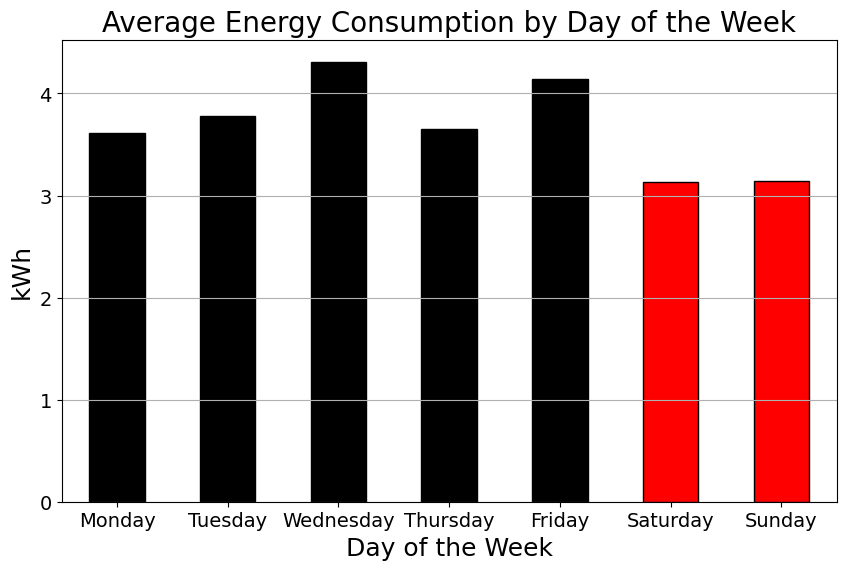

In [112]:
# weekly usage
df['day_name'] = df['date'].dt.day_name()
energy_by_day = df.groupby('day_name')['energy_consumption'].mean()
energy_by_day = energy_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

colors = ['black', 'black', 'black', 'black', 'black', 'red', 'red']

plt.figure(figsize=(10, 6))
energy_by_day.plot(kind='bar', color=colors, edgecolor='black')

# plot
plt.title('Average Energy Consumption by Day of the Week', fontsize=20)
plt.xlabel('Day of the Week', fontsize=18)
plt.ylabel('kWh', fontsize=18)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tick_params(axis='both', labelsize=14)
plt.show()
